In [44]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [45]:
data_set = mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [46]:
#normalize the data

x_train ,x_test = x_train/255.0 , x_test/255.0


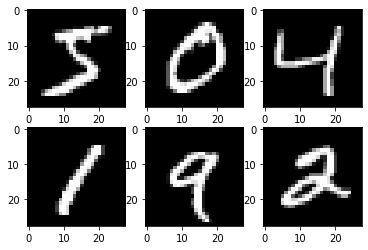

In [47]:
#to display the images
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
plt.show()

In [63]:
# model
model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128 ,activation = 'relu'),
    keras.layers.Dense(10),
    keras.layers.Softmax()
])

In [64]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 128)               100480    
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [66]:
#loss and optimiser
loss = keras.losses.sparse_categorical_crossentropy
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics =["accuracy"]

In [67]:
model.compile(loss = loss , optimizer=optim , metrics=metrics)

In [70]:
#training
batch_size = 64
epochs = 10

model.fit(x_train ,y_train , batch_size = batch_size , epochs = epochs ,shuffle=True ,verbose= 1)

Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0477 - accuracy: 0.9862
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0390 - accuracy: 0.9884
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0316 - accuracy: 0.9904
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0268 - accuracy: 0.9923
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0222 - accuracy: 0.9936
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0176 - accuracy: 0.9953
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0162 - accuracy: 0.9955
Epoch 8/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0134 - accuracy: 0.9963
Epoch 9/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0109 - accuracy: 0.9970
Epoch 10/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0095 - accuracy: 0.9976

In [71]:
#evalvuate the model
model.evaluate(x_test,y_test, batch_size =batch_size ,verbose= 1)

157/157 [==============================] - 0s 901us/step - loss: 0.0810 - accuracy: 0.9786


[0.08098943531513214, 0.978600025177002]

In [73]:
#prdiction
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 671us/step


In [87]:
model.get_weights()

[array([[-0.0752134 , -0.05148867, -0.03085791, ...,  0.02838098,
          0.05055732, -0.0145397 ],
        [-0.05999284,  0.02531558,  0.05726407, ..., -0.0755206 ,
         -0.00120679,  0.06020965],
        [-0.06957795, -0.00833742,  0.06539927, ...,  0.05730393,
          0.02760736, -0.04513542],
        ...,
        [ 0.01527658,  0.01477002, -0.04780308, ..., -0.06915173,
          0.07794037, -0.01675826],
        [ 0.03820842, -0.01226791, -0.04554135, ..., -0.02315529,
         -0.0745978 , -0.01143547],
        [-0.01402586,  0.02773567, -0.07232176, ...,  0.04319301,
          0.07635366, -0.07890299]], dtype=float32),
 array([ 0.30259427, -0.08985037, -0.14301096, -0.02524285, -0.11977986,
        -0.07684338, -0.07514037, -0.01240297, -0.15331408, -0.02457972,
         0.22897564, -0.09123969, -0.06718618,  0.1403346 , -0.14423391,
        -0.06233506,  0.01826939, -0.10289853, -0.01579062,  0.182828  ,
         0.21812242,  0.19495861,  0.21634401, -0.11054827,  0.162

In [88]:
model.save('mnist.hdf5')